# Sweat Stack Python client library <img src="https://sweatstack.no/images/favicon-white-bg-32px.png">

This notebook contains examples of how to use this library.
More documentation can be found [here](https://sweatstack.no).

We'll start by importing the library:

In [1]:
import sweatstack as ss

## Authentication

If you opened this JupyterLab instance using the `sweatlab` command, then you are already authenticated. If not, use `ss.login()`.

In [2]:
ss.login()

Waiting for authorization... (listening on port 8184)
If not redirected, open the following URL in your browser: https://app.sweatstack.no/oauth/authorize?client_id=j0mX9SQQAJXHmf6jUsbX&redirect_uri=http%3A%2F%2Flocalhost%3A8184&code_challenge=4asNjFWzkHQpy6Ju5t4jknU6JnFVqZzLwvrUDJJW0tc

Sweat Stack Python login successful.


This will set the `SWEAT_STACK_API_KEY` environment variable for the library to do API requests on your behalf to the Sweat Stack API.

## Listing activities

To list activities, you can use the `list_activities()` function. By default, this returns all your activities in a pandas.DataFrame:

In [4]:
activities = ss.list_activities(as_dataframe=True)
activities.head()

id title                 start                   end  \
0  MJ234jdDcoHbSZpCQdHb  None  2024-09-09T06:24:59Z  2024-09-09T06:46:24Z   
1  PEcOLc75YGVFzs1s5UNu  None  2024-09-08T16:57:24Z  2024-09-08T17:20:46Z   
2  Mte2MrMUfi0bBXdIc6FS  None  2024-09-08T09:10:10Z  2024-09-08T10:16:44Z   
3  6kQ3WSYOYrNQJ55MBD7M  None  2024-09-07T12:55:47Z  2024-09-07T14:34:57Z   
4  3BcLJSIzSHUyD1iutspJ  None  2024-09-05T17:36:20Z  2024-09-05T18:08:57Z   

     sport stationary                                            metrics  \
0  cycling       True  [temperature, heart_rate, core_temperature, ca...   
1  running      False  [temperature, heart_rate, cadence, latitude, p...   
2   hiking      False  [temperature, heart_rate, core_temperature, ca...   
3  cycling      False  [temperature, heart_rate, core_temperature, ca...   
4  running      False  [temperature, heart_rate, latitude, power, cad...   

     duration         display_sport  
0    PT21M25S  cycling (stationary)  
1    PT23M22S               running  
2   PT1H6M34S                hiking  
3  PT1H39M10S               cycling  
4    PT32M37S               running

If you want to use `Activity` objects directly, you can pass `as_dataframe=False` and for example iterate over the activities:

In [5]:
for activity in ss.list_activities(limit=5, as_dataframe=False):
    print(activity.start, activity.sport)

2024-09-09 06:24:59+00:00 Sport.cycling
2024-09-08 16:57:24+00:00 Sport.running
2024-09-08 09:10:10+00:00 Sport.hiking
2024-09-07 12:55:47+00:00 Sport.cycling
2024-09-05 17:36:20+00:00 Sport.running


> **Info:** The `ss.list_activities()` returns a summary of the activities, not the actual timeseries data.
> To get the actual data, you need to use the `get_activity_data()` or `get_latest_activity_data()`) methods documented below.

## Getting activity summaries

To get the summary of an activity, you can use the `get_activity()` or `get_latest_activity()` function:

In [6]:
activity = ss.get_latest_activity()
activity

ActivityDetail(id='MJ234jdDcoHbSZpCQdHb', title=None, start=datetime.datetime(2024, 9, 9, 6, 24, 59, tzinfo=TzInfo(UTC)), end=datetime.datetime(2024, 9, 9, 6, 46, 24, tzinfo=TzInfo(UTC)), sport=<Sport.cycling: 'cycling'>, stationary=True, metrics=[<Metric.temperature: 'temperature'>, <Metric.heart_rate: 'heart_rate'>, <Metric.core_temperature: 'core_temperature'>, <Metric.cadence: 'cadence'>, <Metric.power: 'power'>, <Metric.distance: 'distance'>], laps=[ActivityLap(start=datetime.datetime(2024, 9, 9, 6, 24, 59, tzinfo=TzInfo(UTC)), end=datetime.datetime(2024, 9, 9, 6, 43, 45, tzinfo=TzInfo(UTC)), power=128.77639751552795, speed=None, distance=0.0, altitude=None, heart_rate=112.86779059449867, heart_rate_start=82.0, heart_rate_end=120.0, cadence=85.59006211180125, temperature=29.23513753327418, core_temperature=None, smo2=None, duration='PT18M46S'), ActivityLap(start=datetime.datetime(2024, 9, 9, 6, 43, 46, tzinfo=TzInfo(UTC)), end=datetime.datetime(2024, 9, 9, 6, 46, 24, tzinfo=TzInfo

In [7]:
ss.get_activity(activity.id)

ActivityDetail(id='MJ234jdDcoHbSZpCQdHb', title=None, start=datetime.datetime(2024, 9, 9, 6, 24, 59, tzinfo=TzInfo(UTC)), end=datetime.datetime(2024, 9, 9, 6, 46, 24, tzinfo=TzInfo(UTC)), sport=<Sport.cycling: 'cycling'>, stationary=True, metrics=[<Metric.temperature: 'temperature'>, <Metric.heart_rate: 'heart_rate'>, <Metric.core_temperature: 'core_temperature'>, <Metric.cadence: 'cadence'>, <Metric.power: 'power'>, <Metric.distance: 'distance'>], laps=[ActivityLap(start=datetime.datetime(2024, 9, 9, 6, 24, 59, tzinfo=TzInfo(UTC)), end=datetime.datetime(2024, 9, 9, 6, 43, 45, tzinfo=TzInfo(UTC)), power=128.77639751552795, speed=None, distance=0.0, altitude=None, heart_rate=112.86779059449867, heart_rate_start=82.0, heart_rate_end=120.0, cadence=85.59006211180125, temperature=29.23513753327418, core_temperature=None, smo2=None, duration='PT18M46S'), ActivityLap(start=datetime.datetime(2024, 9, 9, 6, 43, 46, tzinfo=TzInfo(UTC)), end=datetime.datetime(2024, 9, 9, 6, 46, 24, tzinfo=TzInfo

## Getting activity data

To get the timeseries data of one activity, you can use the `get_activity_data()` or `get_latest_activity_data()` methods:

In [8]:
data = ss.get_activity_data(activity.id)
data.head()

sport       sub_sport  distance  power  heart_rate  \
2024-09-09 06:24:59  cycling  indoor_cycling         0    106          82   
2024-09-09 06:25:00  cycling  indoor_cycling         0    100          83   
2024-09-09 06:25:01  cycling  indoor_cycling         0     81          85   
2024-09-09 06:25:02  cycling  indoor_cycling         0    109          85   
2024-09-09 06:25:03  cycling  indoor_cycling         0    112          86   

                     cadence  temperature  core_temperature  duration  lap  \
2024-09-09 06:24:59     80.0           28               NaN       NaN    0   
2024-09-09 06:25:00     79.0           28               NaN    1000.0    0   
2024-09-09 06:25:01     79.0           28               NaN    1000.0    0   
2024-09-09 06:25:02     79.0           28               NaN    1000.0    0   
2024-09-09 06:25:03     80.0           28               NaN    1000.0    0   

                    lap_trigger  
2024-09-09 06:24:59      manual  
2024-09-09 06:25:00      manual  
2024-09-09 06:25:01      manual  
2024-09-09 06:25:02      manual  
2024-09-09 06:25:03      manual

In [9]:
data = ss.get_latest_activity_data()
data.head()

sport       sub_sport  distance  power  heart_rate  \
2024-09-09 06:24:59  cycling  indoor_cycling         0    106          82   
2024-09-09 06:25:00  cycling  indoor_cycling         0    100          83   
2024-09-09 06:25:01  cycling  indoor_cycling         0     81          85   
2024-09-09 06:25:02  cycling  indoor_cycling         0    109          85   
2024-09-09 06:25:03  cycling  indoor_cycling         0    112          86   

                     cadence  temperature  core_temperature  duration  lap  \
2024-09-09 06:24:59     80.0           28               NaN       NaN    0   
2024-09-09 06:25:00     79.0           28               NaN    1000.0    0   
2024-09-09 06:25:01     79.0           28               NaN    1000.0    0   
2024-09-09 06:25:02     79.0           28               NaN    1000.0    0   
2024-09-09 06:25:03     80.0           28               NaN    1000.0    0   

                    lap_trigger  
2024-09-09 06:24:59      manual  
2024-09-09 06:25:00      manual  
2024-09-09 06:25:01      manual  
2024-09-09 06:25:02      manual  
2024-09-09 06:25:03      manual

These methods returns a pandas DataFrame.
If your are not familiar with pandas and/or DataFrames, start by reading this [introduction](https://pandas.pydata.org/docs/user_guide/10min.html).

Similar as for the summaries, you can use the `get_latest_activity_data()` method to get the timeseries data of the latest activity:

## Longitudinal data

To get the timeseries data of multiple activities, you can use the `get_longitudinal_data()` method:

In [10]:
from datetime import date, timedelta

longitudinal_data = ss.get_longitudinal_data(
    start=date.today() - timedelta(days=30),
    sport="running",
    metrics=["power", "heart_rate"],
)
longitudinal_data.tail()

power  heart_rate        duration
timestamp                                                   
2024-08-20 17:39:43+00:00    123       115.0 0 days 00:00:01
2024-08-20 17:39:44+00:00      0       114.0 0 days 00:00:01
2024-08-20 17:39:45+00:00      0       115.0 0 days 00:00:01
2024-08-20 17:39:46+00:00      0       115.0 0 days 00:00:01
2024-08-20 17:39:47+00:00      0       117.0 0 days 00:00:01

Because the result of `get_longitudinal_data()` can be very large, the data is retrieved in a compressed format (parquet) that requires the `pyarrow` library to be installed. If you intend to use this method, make sure to install the `sweatstack` library with this extra dependency:
```
uv pip install sweatstack[parquet]
```

Also note that depending on the amount of data that you requested, this might take a while.

## Plotting

To plot data, there are a few plotting methods available.

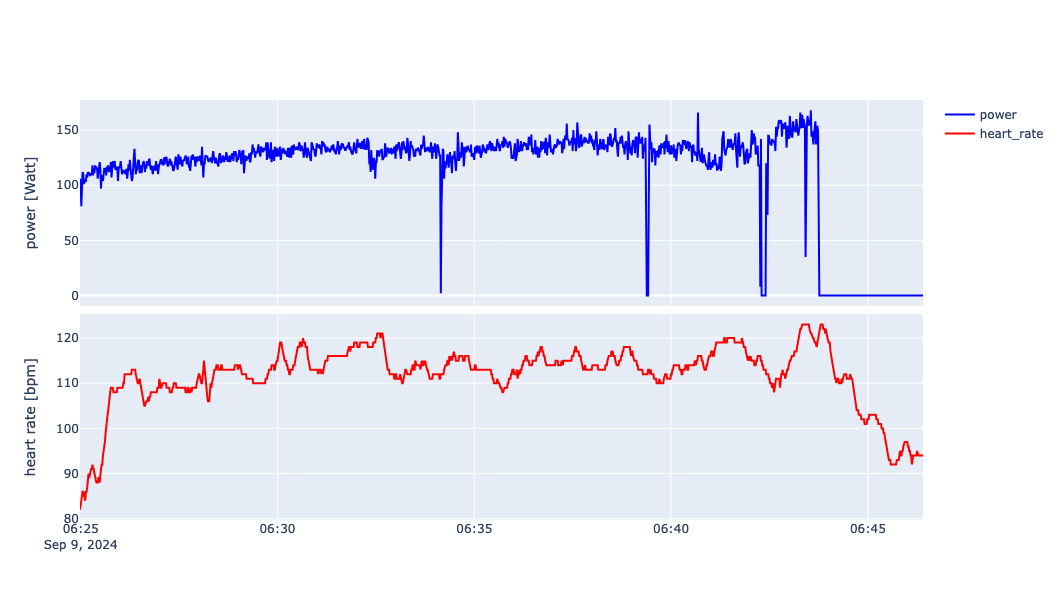

In [11]:
ss.plot_activity_data(activity.id, metrics=["heart_rate", "power"])

...wil plot the all the available columns from the specified activity.

There is also a `ss.plot_latest_activity_data()` method that will plot the latest activity data.

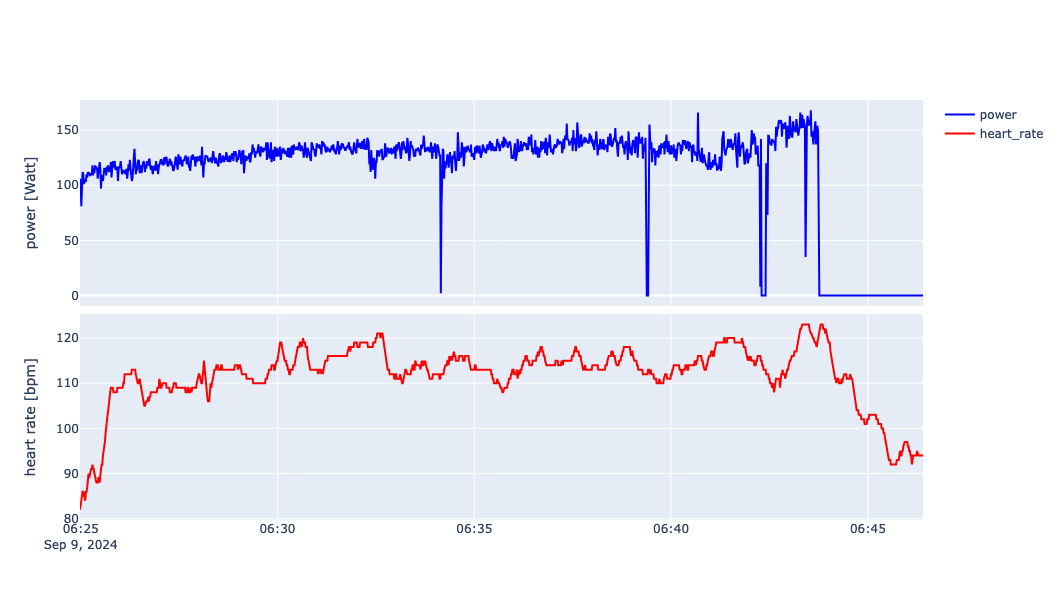

In [12]:
ss.plot_activity_data(activity.id, metrics=["power", "heart_rate"])

All of these methods accept a `metrics` argument, which is a list of metrics that you want to plot, as well as a `subplots` argument, which is a boolean that specifies whether you want to plot each metrics in subplots or not.
Example:

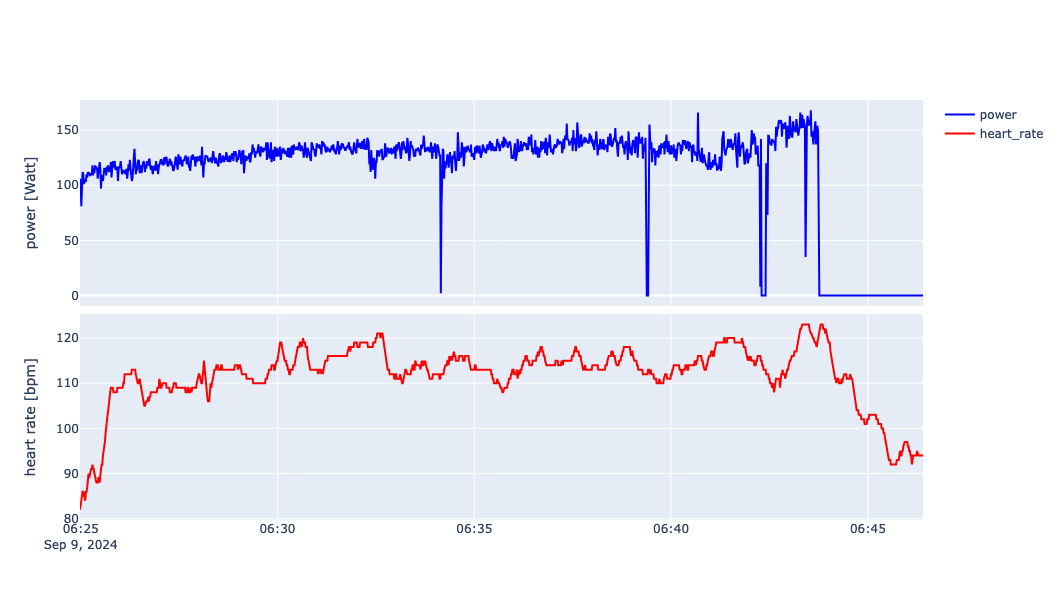

In [13]:
ss.plot_latest_activity_data(metrics=["heart_rate", "power"], subplots=True)

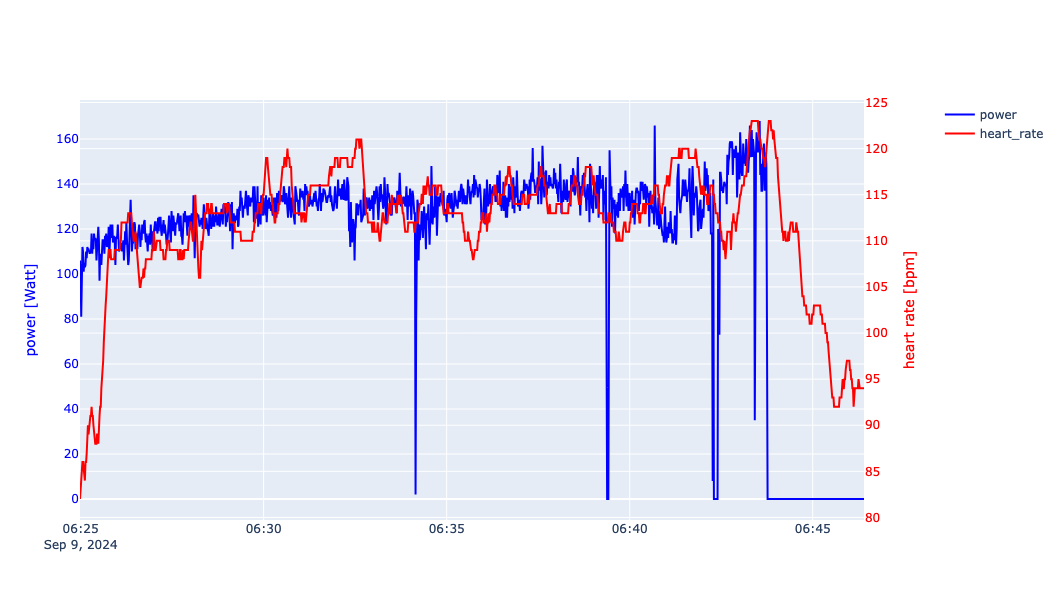

In [14]:
ss.plot_latest_activity_data(metrics=["heart_rate", "power"], subplots=False)

Finally, there is a `ss.plot_scatter()` method that you can use to plot a scatter plot of two metrics:

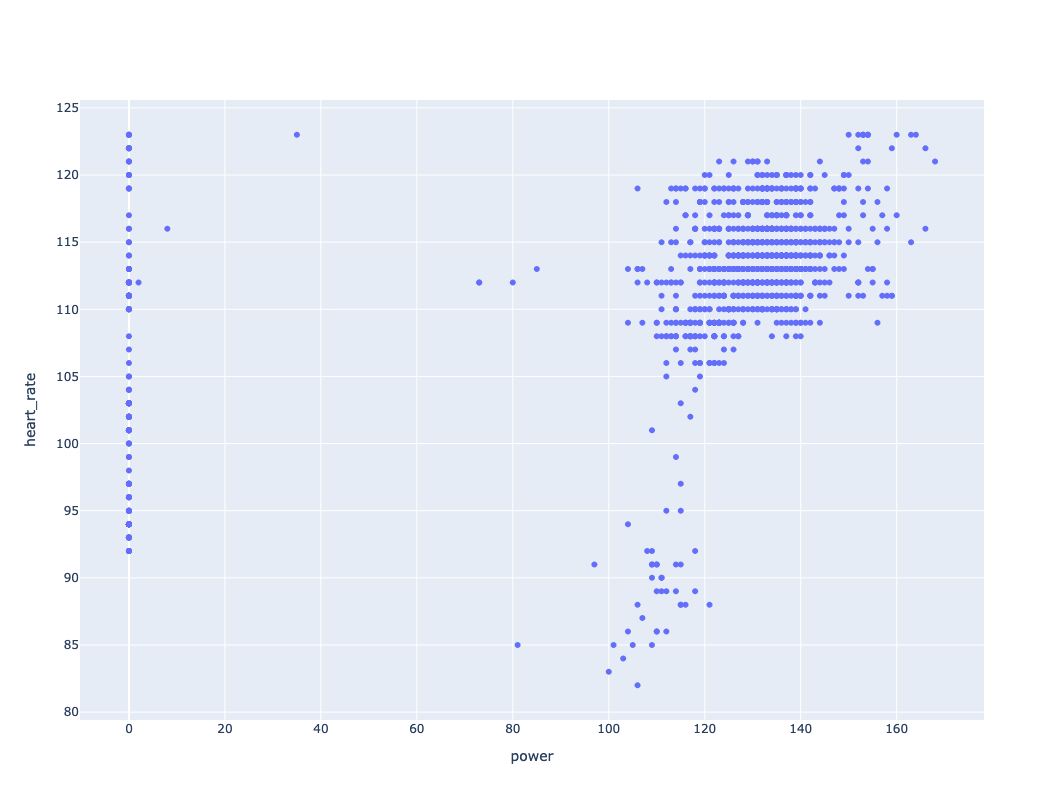

In [15]:
data = ss.get_latest_activity_data()
ss.plot_scatter(x=data["power"], y=data["heart_rate"])

At the moment, only the Plotly plotting backend is available, but more plotting backends (like Matplotlib) will be added in the future.

Please note that these plotting methods are just there for your convenience.
If you want to customize your plots, we recommend using a plotting library like Plotly or Matplotlib directly.
[This](https://pandas.pydata.org/docs/user_guide/visualization.html) page from the pandas documentation gives a good overview of the available plotting options for the `pandas.DataFrames` and `pandas.Series` that this library returns.

## Accessing other user's data

By default, the library will give you access to your own data.

You can list all users you have access to with the `list_accessible_users()` method:

In [ ]:
for user in ss.list_accessible_users():
    print(user)

You can switch to another user by using the `switch_user()` method:

In [6]:
ss.switch_user(user)

Calling any of the methods above will return the data for the user you switched to.

You can easily switch back to your original user by calling the `switch_to_root_user()` method:

In [7]:
ss.switch_to_root_user()

## More documentation

More documentation can be found [here](https://sweatstack.no/python-client-library/).